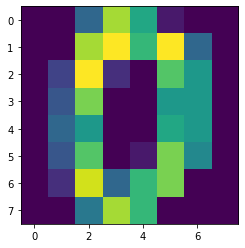

In [7]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline

mnist = load_digits()
mnist.keys()
plt.imshow(mnist.images[0]);

In [8]:
pd.DataFrame(mnist.target).head()

,0
0,0
1,1
2,2
3,3
4,4


In [9]:
pd.DataFrame(mnist.data).head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


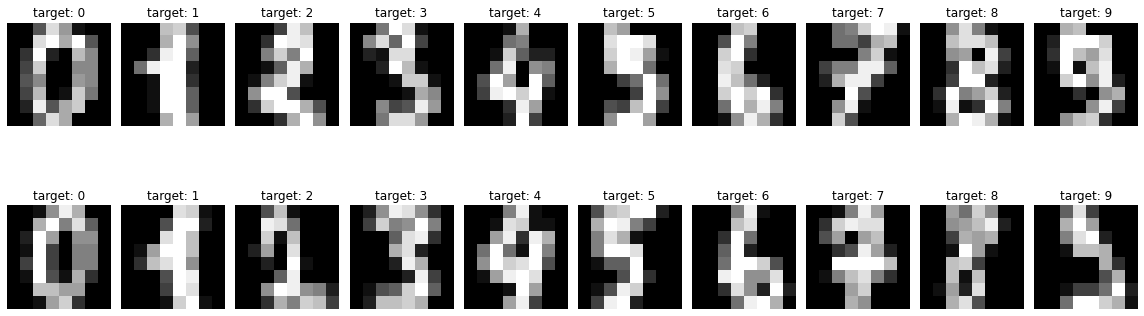

In [10]:
fig, axes = plt.subplots(2, 10, figsize=(16, 6))
for i in range(20):
    axes[i//10, i %10].imshow(mnist.images[i], cmap='gray');
    axes[i//10, i %10].axis('off')
    axes[i//10, i %10].set_title(f"target: {mnist.target[i]}")
    
plt.tight_layout()

In [11]:
# TRAIN TEST SPLIT
x_train, x_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.33, random_state=42)
scaler = StandardScaler()

In [13]:
# Standardization
train_img = scaler.fit_transform(x_train)
test_img = scaler.fit_transform(x_test)

In [21]:
#PCA
pca = PCA(0.85)
pca.fit_transform(train_img)
print("Number of components\n", pca.n_components_)
print("Total variance\n", pca.explained_variance_ratio_.sum())

Number of components %s 
 25
Number of components %s 
 0.8582074518270412


In [29]:
# APPLY LOGISTIC REGRESSION
logisticRegr = LogisticRegression(solver='lbfgs')
start = time.time()
logisticRegr.fit(train_img, y_train)
stop = time.time()

logisticRegr.predict(test_img[:10])

print("Logistic Regression Score ", logisticRegr.score(test_img, y_test))
print("Took ", stop - start, " seconds")

Logistic Regression Score  0.9696969696969697
Took  0.10008478164672852  seconds
